# Library

In [ ]:
import pandas as pd
from bertopic import BERTopic

# 1 Baseline Summary

## Clustering Approach

- **Parameter Setting**: A high parameter was set for HDBSCAN to ensure well-defined clusters that occupy a significant percentage of the total dataset. This baseline is intended to feed machine learning algorithms for prediction purposes.
  
## Initial Clustering Results

- **Clusters Retrieved**: 7 representative clusters were identified:
  1. **Drug sales**
  2. **Bitcoin**
  3. **Scammers and seller reviews**
  4. **Marketplace advertising**
  5. **Purchase reviews**
  6. **Drug purchases**
  7. **Orders**

- **Outliers**: Initially, 34k outliers were found out of a total of 66k records.

- **Performance Metrics**:
  - **Silhouette Score**: 0.64
  - **Davies-Bouldin Score**: 0.6
  - **Coherence-Score**: 0.40

## Outlier Reduction

- **Cosine Measure on Embeddings**: By applying a cosine similarity measure with a 0.53 threshold, the number of outliers was reduced from 34k to 27k, reintroducing about 7k records.

- **Updated Performance Metrics**:
  - **Silhouette Score**: 0.51
  - **Davies-Bouldin Score**: 0.8
  - **Coherence-Score**: 0.40
  
## Trade-off Analysis

- **Outlier Reintroduction**: Reintroducing the outliers found a balance that prevented significant cluster degradation while keeping clusters well separated and defined, as evidenced by the graphs.

- **Cluster Distribution**: The updated clusters are well-distributed:
  - **Maximum cluster size**: 23% of the total dataset
  - **Minimum cluster size**: 7% of the total dataset
  - This distribution avoids large excursions.

## Data Loss and Potential Adjustments

- **Data Loss**: Approximately 40% of the initial dataset was lost. 

- **Potential Correction**: This data loss can potentially be mitigated by lowering the cosine similarity threshold between embeddings.

# Visualize CSV Files

In [37]:
descr_topic = pd.read_csv('CSV7Topic/description_topic.csv')
document_topic = pd.read_csv('CSV7Topic/document_topic_proba.csv')
topics_over_time = pd.read_csv('CSV7Topic/topic_over_time_3.csv')

In [38]:
descr_topic

,Topic,Count,BERTopic_Name,Representation,Representative_Docs,Custom_Name_GenAI,Custom_Name_Zero_Shot
0,4,6299,4_mdma_lsd_get_looking,['mdma' 'lsd' 'get' 'looking' 'wsm' 'good' 'bt...,['hey ro im gon na pull pk'\n 'life wonderful ...,Drug Discussion,buy drugs
1,2,6907,2_vendor_scammer_scam_looking,['vendor' 'scammer' 'scam' 'looking' 'scamming...,['looking good reliable vendor sell ounce' 've...,Trusted Vendor Scams,scammer - vendor scammer
2,1,6236,1_market_empire_dream_nightmare,['market' 'empire' 'dream' 'nightmare' 'vendor...,['next market' 'dream market vendor rstclass n...,Dream Vendor Nightmare,market drug - empire market
3,5,2776,5_order_package_shipping_delivery,['order' 'package' 'shipping' 'delivery' 'pack...,['order accepted day still hasnt marked shippe...,Order Shipping & Tracking,orders
4,6,2823,6_bitcoin_card_wallet_btc,['bitcoin' 'card' 'wallet' 'btc' 'bank' 'credi...,['credit cards paypal prepaid card find'\n 'go...,Financial Services and Products,bitcoin wallet
5,0,8645,0_weed_xanax_vendor_cocaine,['weed' 'xanax' 'vendor' 'cocaine' 'mg' 'uk' '...,['high quality weed thc product europe'\n 'new...,Drug Vendor Europe,sell drugs
6,3,4230,3_review_vendor review_vendor_review vendor,['review' 'vendor review' 'vendor' 'review ven...,['empire vendor cocaine review' 'first ever re...,Vendor MDMA Review,review vendor - review product


In [41]:
print(document_topic.shape[0])
document_topic.head(5)

37916


,Document,Topic,Probability,Created_on,BERTopic_Name
0,checks,4,0.000000,2020-01-09,4_mdma_lsd_get_looking
1,trusted vendor status,2,0.944247,2020-01-09,2_vendor_scammer_scam_looking
2,empire exit scam iiflux user incomming,1,1.000000,2019-11-06,1_market_empire_dream_nightmare
3,ecstasy vendor packs,5,0.797741,2020-01-09,5_order_package_shipping_delivery
4,opening bank account person fake id,6,1.000000,2019-11-06,6_bitcoin_card_wallet_btc


In [42]:
print(topics_over_time.shape[0])
topics_over_time.head(5)

21


,Topic,Words,Frequency,Timestamp,Custom_Name_GenAI
0,0,"vendor, weed, xanax, cocaine, mg",1563,2019-08-05 17:55:40.800,Drug Vendor Europe
1,0,"vendor, weed, xanax, mg, cocaine",7054,2019-10-29 08:00:00.000,Drug Vendor Europe
2,0,"vendor, nt, weed, drug, looking",28,2020-01-21 16:00:00.000,Drug Vendor Europe
3,1,"market, empire, dream, vendor, nightmare",1102,2019-08-05 17:55:40.800,Dream Vendor Nightmare
4,1,"market, empire, dream, vendor, nightmare",5109,2019-10-29 08:00:00.000,Dream Vendor Nightmare


# Visualize Graphs

In [7]:
topic_model = BERTopic.load("../../../Analyze_files/CombiningAnalysisCompleteDataset/ThreadAnalysis/Models/topic_model_0.64SilNew", embedding_model='distiluse-base-multilingual-cased-v1')

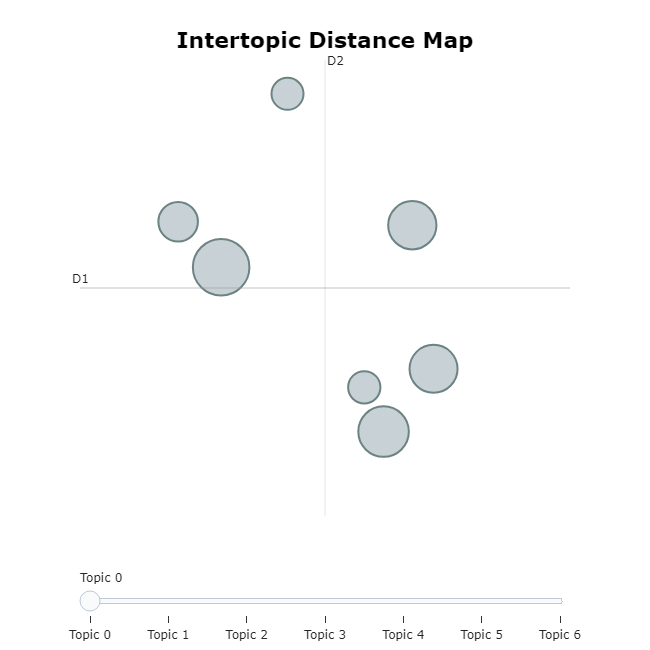

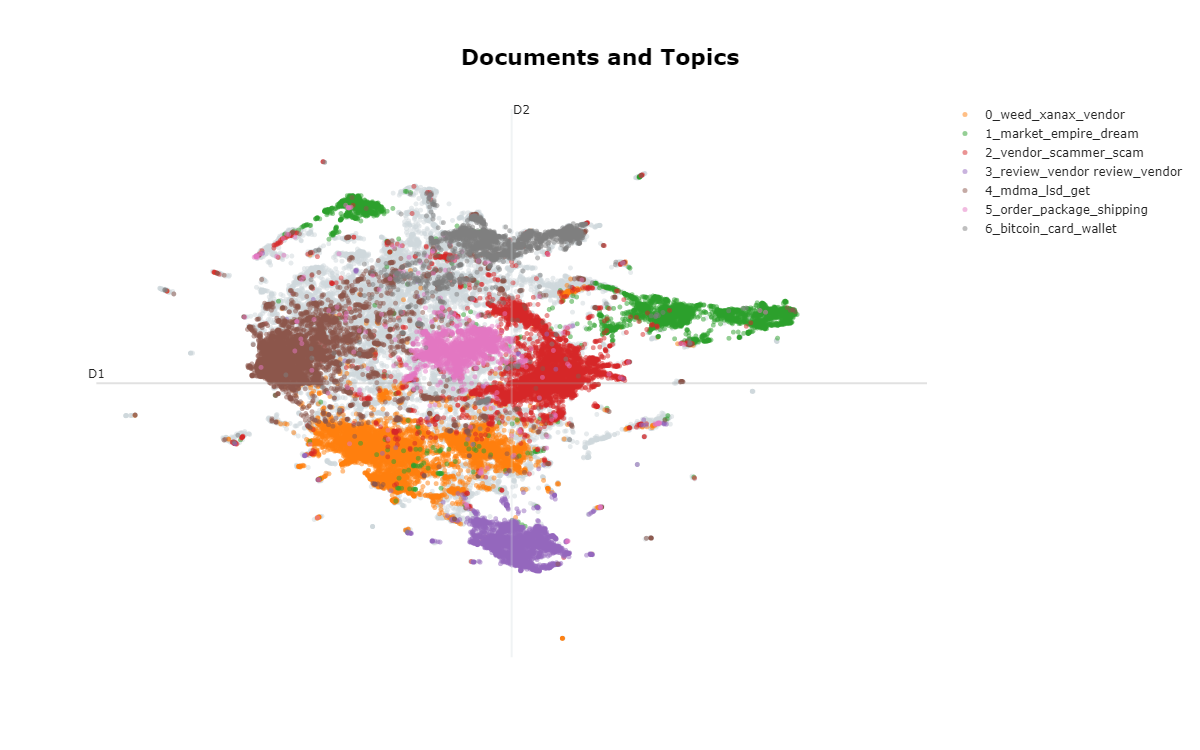

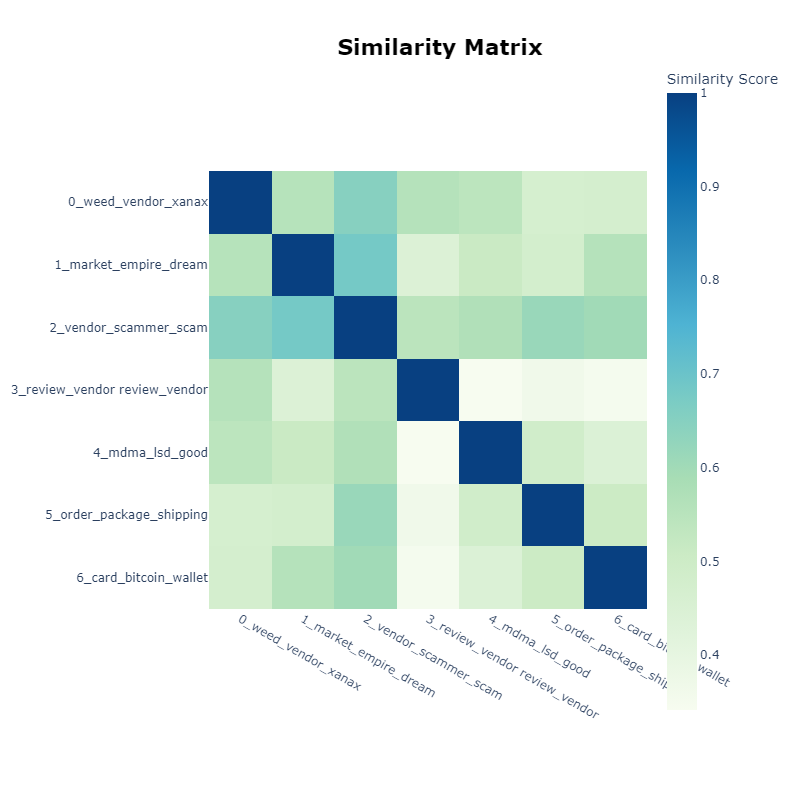

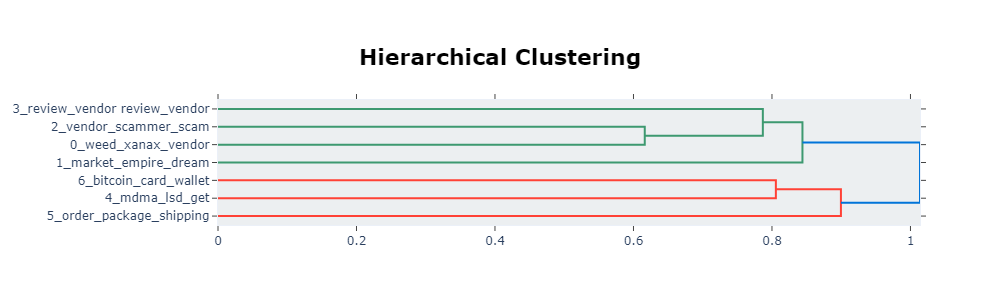

In [8]:
topic_model.visualize_barchart(top_n_topics=10, custom_labels=True, n_words=10, width=350, height=350)

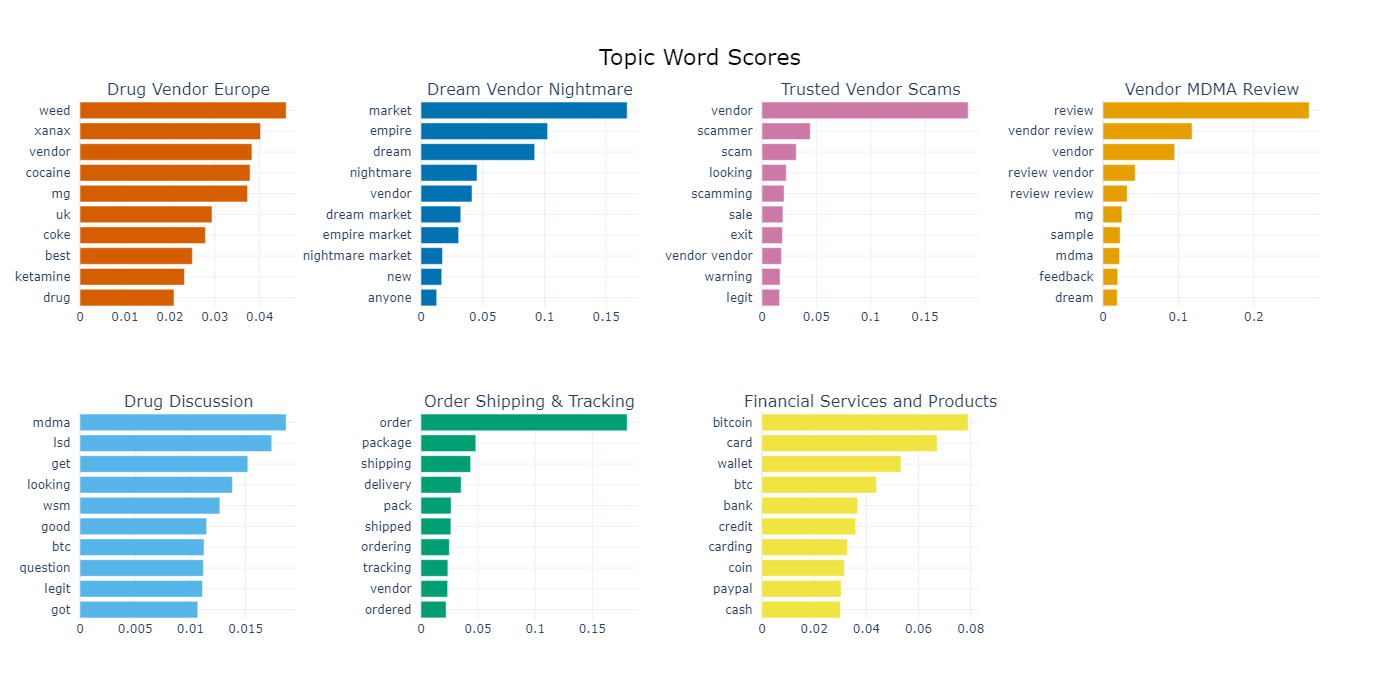

In [9]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=10, width=1250, height=700, custom_labels=True)

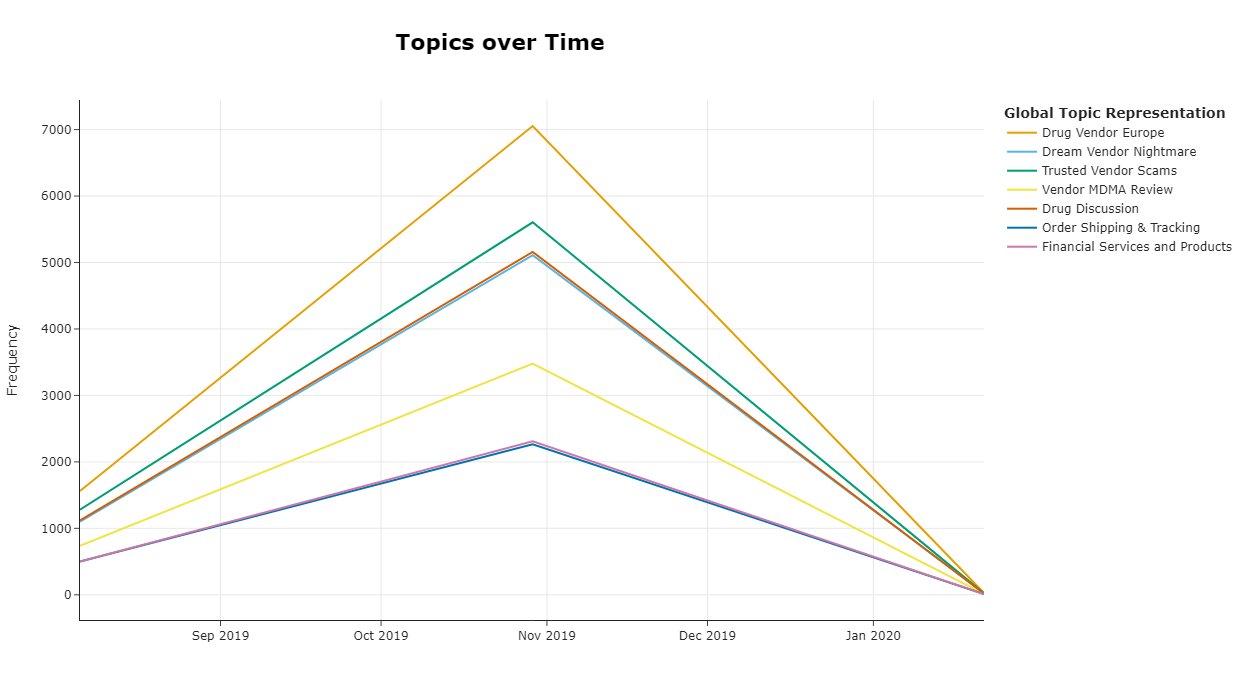

# Predict Models - Usage

In [9]:
topic_model = BERTopic.load("../../../Analyze_files/CombiningAnalysisCompleteDataset/ThreadAnalysis/Models/topic_model_0.64SilNew", embedding_model='distiluse-base-multilingual-cased-v1')

In [4]:
sentence = ['i want to by some xanax and guns and coke']
topic, _ = topic_model.transform(sentence)
topic_model.get_topic_info(topic[0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches: 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]


,Topic,Count,Name,CustomName,Representation,Representative_Docs
0,0,8645,0_weed_xanax_vendor_cocaine,Drug Vendor Europe,"[weed, xanax, vendor, cocaine, mg, uk, coke, b...","[high quality weed thc product europe, new xan..."


In [5]:
sentence = ['really bad vendors he scammed me']
topic, _ = topic_model.transform(sentence)
topic_model.get_topic_info(topic[0])

Batches: 100%|██████████| 1/1 [00:00<00:00, 14.57it/s]


,Topic,Count,Name,CustomName,Representation,Representative_Docs
0,2,6907,2_vendor_scammer_scam_looking,Trusted Vendor Scams,"[vendor, scammer, scam, looking, scamming, sal...","[looking good reliable vendor sell ounce, vend..."


In [6]:
sentence = ['xtc']
topic, _ = topic_model.transform(sentence)
topic_model.get_topic_info(topic[0])

Batches: 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]


,Topic,Count,Name,CustomName,Representation,Representative_Docs
0,4,6299,4_mdma_lsd_get_looking,Drug Discussion,"[mdma, lsd, get, looking, wsm, good, btc, ques...","[hey ro im gon na pull pk, life wonderful life..."


In [7]:
sentence = ['closed market']
topic, _ = topic_model.transform(sentence)
topic_model.get_topic_info(topic[0])

Batches: 100%|██████████| 1/1 [00:00<00:00, 24.94it/s]


,Topic,Count,Name,CustomName,Representation,Representative_Docs
0,1,6236,1_market_empire_dream_nightmare,Dream Vendor Nightmare,"[market, empire, dream, nightmare, vendor, dre...","[next market, dream market vendor rstclass nig..."


In [8]:
sentence = ['i want to buy coke cutted']
topic, _ = topic_model.transform(sentence)
topic_model.get_topic_info(topic[0])

Batches: 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]


,Topic,Count,Name,CustomName,Representation,Representative_Docs
0,0,8645,0_weed_xanax_vendor_cocaine,Drug Vendor Europe,"[weed, xanax, vendor, cocaine, mg, uk, coke, b...","[high quality weed thc product europe, new xan..."


# HuggingFace

In [ ]:
topic_model.push_to_hf_hub(
    repo_id="D0men1c0/ISSR_Dark_Web_7Topics",
    save_embedding_model='distiluse-base-multilingual-cased-v1',
    save_ctfidf=True
)

In [16]:
topic_model = BERTopic.load("D0men1c0/ISSR_Dark_Web_7Topics")

In [17]:
sentence = ['closed market']
topic, _ = topic_model.transform(sentence)
topic_model.get_topic_info(topic[0])

Batches: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]
2024-07-31 13:17:35,319 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


,Topic,Count,Name,CustomName,Representation,Representative_Docs
0,1,6236,1_market_empire_dream_nightmare,Dream Vendor Nightmare,"[market, empire, dream, nightmare, vendor, dre...",NaN
